In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import gzip
import scipy
import collections
from collections import Counter
import sklearn

In [43]:
print(matplotlib.__version__)
print (np.__version__)
print (sns.__version__)
print (pd.__version__)
print (scipy.__version__)
print (sklearn.__version__)
from platform import python_version

print(python_version())


3.5.2
1.21.5
0.11.2
1.4.2
1.8.0
1.0.2
3.8.3


In [2]:
v2R_df = pd.read_csv('v2R_all_exp_all_reps_com_and_norm.csv.gz', sep=',', index_col=0)

v2R_df['min_cells'] = v2R_df[['37_cells_count', 'DMSOA_cells_count', 'DMSOB_cells_count','DMSOC_cells_count']].min(axis=1)
print (len(v2R_df))
v2R_df_over50 = v2R_df.loc[v2R_df['min_cells'] > 50].copy()
print (len(v2R_df_over50))

7791
6844


In [3]:
clin_df = pd.DataFrame({'gnomAD': pd.Series(list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True]['ctrls_comb'])), \
                        'Benign': pd.Series(list(v2R_df_over50.loc[v2R_df_over50['clinvar'] == 'benign']['ctrls_comb'])), \
                        'Likely benign': pd.Series(list(v2R_df_over50.loc[v2R_df_over50['clinvar'] == 'likely_benign']['ctrls_comb'])), \
                           'Patho.': pd.Series(pd.Series(list(v2R_df_over50.loc[v2R_df_over50['clinvar'] == 'patho']['ctrls_comb']))), \
                        'Likely patho.': pd.Series(pd.Series(list(v2R_df_over50.loc[v2R_df_over50['clinvar'] == 'likely_patho']['ctrls_comb']))), \
                        'VUS':pd.Series(pd.Series(list(v2R_df_over50.loc[v2R_df_over50['clinvar'] == 'VUS']['ctrls_comb']))), \
                        'NDI':pd.Series(pd.Series(list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI']['ctrls_comb']))), \
                        'NSIAD':pd.Series(pd.Series(list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NSIAD']['ctrls_comb'])))})


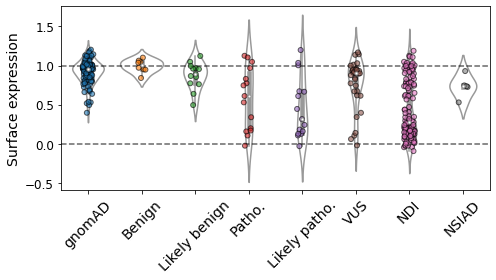

In [4]:
plt.figure(figsize=(7, 4))
my_pal = {'Patho.': 'red', \
          'Likely patho.': 'lightred', \
          'NDI': 'orange', \
          'Benign': 'blue', \
          'gnomAD':'green', \
          'NSIAD':'brown', \
         'VUS':'purple'}

sns.stripplot(data = clin_df, alpha=0.6, edgecolor='black', linewidth=1)#, palette = my_pal)
#sns.stripplot(data = clin_df, alpha=0.4, color='darkgreen')#, palette = 'Set2')



sns.violinplot(data = clin_df, color='white', alpha=0.3)
#plt.ylim(-0.5, 1.8)
plt.ylabel('Surface expression', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.axhline(y=1, linestyle='dashed', color='k', alpha=0.6)
plt.axhline(y=0, linestyle='dashed', color='k', alpha=0.6)
#plt.axhline(y=0.825, linestyle='dotted', color='grey', alpha=0.6)
#plt.axhline(y=0.35, linestyle='dotted', color='grey', alpha=0.6)



plt.tight_layout()

In [5]:
clinical_category_df = pd.DataFrame(index=['Poorly expressed', 'Moderately expressed', 'Well expressed'])



clinical_category_df['gnomAD'] = [len([i for i in clin_df['gnomAD'] if i < 0.35])/ len(clin_df['gnomAD'].dropna()), \
                                 len([i for i in clin_df['gnomAD'] if i >= 0.35 and i < 0.825])/ len(clin_df['gnomAD'].dropna()), \
                                 len([i for i in clin_df['gnomAD'] if i > 0.825])/ len(clin_df['gnomAD'].dropna())]

clinical_category_df['Benign'] = [len([i for i in clin_df['Benign'] if i < 0.35]) / len(clin_df['Benign'].dropna()), \
                                 len([i for i in clin_df['Benign'] if i >= 0.35 and i < 0.825])/ len(clin_df['Benign'].dropna()), \
                                 len([i for i in clin_df['Benign'] if i > 0.825])/ len(clin_df['Benign'].dropna())]

clinical_category_df['Likely benign'] = [len([i for i in clin_df['Likely benign'] if i < 0.35])/ len(clin_df['Likely benign'].dropna()), \
                                 len([i for i in clin_df['Likely benign'] if i >= 0.35 and i < 0.825])/ len(clin_df['Likely benign'].dropna()), \
                                 len([i for i in clin_df['Likely benign'] if i > 0.825])/ len(clin_df['Likely benign'].dropna())]

clinical_category_df['Patho.'] = [len([i for i in clin_df['Patho.'] if i < 0.35])/ len(clin_df['Patho.'].dropna()), \
                                 len([i for i in clin_df['Patho.'] if i >= 0.35 and i < 0.825])/ len(clin_df['Patho.'].dropna()), \
                                 len([i for i in clin_df['Patho.'] if i > 0.825])/ len(clin_df['Patho.'].dropna())]

clinical_category_df['Likely patho.'] = [len([i for i in clin_df['Likely patho.'] if i < 0.35])/ len(clin_df['Likely patho.'].dropna()), \
                                 len([i for i in clin_df['Likely patho.'] if i >= 0.35 and i < 0.825])/ len(clin_df['Likely patho.'].dropna()), \
                                 len([i for i in clin_df['Likely patho.'] if i > 0.825])/ len(clin_df['Likely patho.'].dropna())]
clinical_category_df['VUS'] = [len([i for i in clin_df['VUS'] if i < 0.35])/ len(clin_df['VUS'].dropna()), \
                                 len([i for i in clin_df['VUS'] if i >= 0.35 and i < 0.825])/ len(clin_df['VUS'].dropna()), \
                                 len([i for i in clin_df['VUS'] if i > 0.825])/ len(clin_df['VUS'].dropna())]
clinical_category_df['NDI'] = [len([i for i in clin_df['NDI'] if i < 0.35])/ len(clin_df['NDI'].dropna()), \
                                 len([i for i in clin_df['NDI'] if i >= 0.35 and i < 0.825])/ len(clin_df['NDI'].dropna()), \
                                 len([i for i in clin_df['NDI'] if i > 0.825])/ len(clin_df['NDI'].dropna())]

clinical_category_df['NSIAD'] = [len([i for i in clin_df['NSIAD'] if i < 0.35])/ len(clin_df['NSIAD'].dropna()), \
                                 len([i for i in clin_df['NSIAD'] if i >= 0.35 and i < 0.825])/ len(clin_df['NSIAD'].dropna()), \
                                 len([i for i in clin_df['NSIAD'] if i > 0.825])/ len(clin_df['NSIAD'].dropna())]



In [6]:
clinical_category_df

,gnomAD,Benign,Likely benign,Patho.,Likely patho.,VUS,NDI,NSIAD
Poorly expressed,0.00000,0.0,0.000000,0.400000,0.533333,0.15625,0.556452,0.0
Moderately expressed,0.22549,0.0,0.307692,0.266667,0.266667,0.25000,0.209677,0.8
Well expressed,0.77451,1.0,0.692308,0.333333,0.200000,0.59375,0.233871,0.2


<Figure size 504x72 with 0 Axes>

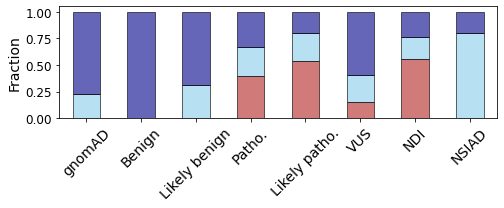

In [7]:
plt.figure(figsize=(7, 1))

clinical_category_df.T.plot.bar(stacked=True, legend=False, color=['firebrick', 'skyblue', 'darkblue'], \
                                edgecolor='k', alpha=0.6, figsize=(7, 3))
plt.ylabel('Fraction', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

In [8]:
print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['Transmembrane'] == True)]))


1789


In [9]:
print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] < 0.35)]))
print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] >= 0.35) & \
                            (v2R_df_over50['ctrls_comb'] < 0.825)]))

print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] >= 0.825)]))

print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564)]))

print (979 + 953 + 663)

print (len(v2R_df.loc[(v2R_df['alpha_missense'] > 0.564)]))


979
953
663
2595
2595
2911


/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


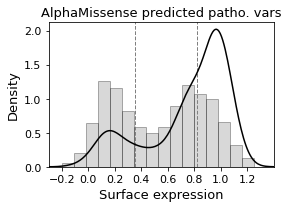

In [10]:
plt.figure(figsize=(4, 3))

#0.564 as alpha missense threshold is from the alphamissense paper, Fig S4A
plt.title('AlphaMissense predicted patho. vars', fontsize=13)

plt.axvline(x = 0.35, color='gray', linestyle='dashed', linewidth = 1)
plt.axvline(x = 0.825, color='gray', linestyle='dashed', linewidth = 1)
#plt.hist(v2R_df_over50.loc[(v2R_df_over50['stop'] == False) & (v2R_df_over50['syn_WT'] == False)]['ctrls_comb'])
#sns.distplot(v2R_df_over50.loc[(v2R_df_over50['stop'] == True) & (v2R_df_over50['pos'] < 300)]['ctrls_comb'], color='red', hist=False)
sns.distplot(v2R_df_over50.loc[(v2R_df_over50['stop'] == False) & (v2R_df_over50['syn_WT'] == False)]['ctrls_comb'], color='k', hist=False)

plt.hist(v2R_df_over50.loc[v2R_df_over50['alpha_missense'] > 0.564]['ctrls_comb'], alpha=0.3, bins=16, edgecolor='k', color='grey', density=True)
plt.xlim(-0.3, 1.4)

plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Surface expression', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.tight_layout()

In [11]:
poorly_exp_patho_df = v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] < 0.35)]
mod_exp_patho_df = v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] >= 0.35) & (v2R_df_over50['ctrls_comb'] < 0.825)]
well_exp_patho_df = v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] > 0.825)]


In [12]:
poorly_exp_patho_vals = poorly_exp_patho_df['dist_to_AVP_7KH0']
mod_exp_patho_vals = mod_exp_patho_df['dist_to_AVP_7KH0']
well_exp_patho_vals = well_exp_patho_df['dist_to_AVP_7KH0']

In [13]:
print (scipy.stats.mannwhitneyu(well_exp_patho_vals.dropna(), mod_exp_patho_vals.dropna()))
print (scipy.stats.mannwhitneyu(poorly_exp_patho_vals.dropna(), mod_exp_patho_vals.dropna()))
print (scipy.stats.mannwhitneyu(poorly_exp_patho_vals.dropna(), well_exp_patho_vals.dropna()))

MannwhitneyuResult(statistic=254740.0, pvalue=1.8550972842204167e-09)
MannwhitneyuResult(statistic=488061.5, pvalue=0.033093201902005924)
MannwhitneyuResult(statistic=407998.0, pvalue=2.18306039663084e-21)


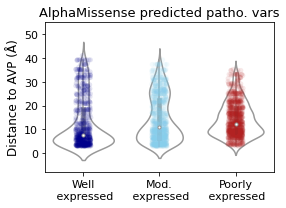

In [14]:
plt.figure(figsize=(4, 3))
AM_patho_df = pd.DataFrame({'Well\n expressed': pd.Series(well_exp_patho_vals), \
            'Mod.\n expressed': pd.Series(mod_exp_patho_vals), \
            'Poorly\n expressed': pd.Series(poorly_exp_patho_vals)})

#plt.figure(figsize=(6, 4))
my_pal = {'Well\n expressed': 'darkblue', \
          'Mod.\n expressed': 'skyblue', \
          'Poorly\n expressed': 'firebrick'}

sns.stripplot(data = AM_patho_df, alpha=0.1, palette = my_pal)

sns.violinplot(data = AM_patho_df, color='white')
plt.ylabel('Distance to AVP (Å)', fontsize=12)
plt.title('AlphaMissense predicted patho. vars', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.ylim(-8, 55)

plt.tight_layout()

In [15]:
print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] < 0.35)]))
print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] >= 0.35) & \
                            (v2R_df_over50['alpha_missense'] < 0.825)]))

print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] > 0.825)]))

print (len(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564)]))


979
759
663
2595


In [20]:
poorly_exp_patho = Counter(list(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] < 0.35)]['pos']))
mod_exp_patho = Counter(list(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] >= 0.35) & (v2R_df_over50['ctrls_comb'] < 0.825)]['pos']))
well_exp_patho = Counter(list(v2R_df_over50.loc[(v2R_df_over50['alpha_missense'] > 0.564) & (v2R_df_over50['ctrls_comb'] >= 0.35) & (v2R_df_over50['ctrls_comb'] < 0.825)]['pos']))


In [35]:
surfexp_NDI_vals = list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI'].ctrls_comb.dropna())
surfexp_benign_vals = list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True].ctrls_comb.dropna())
surfexp_TPRs = []
surfexp_FPRs = []

print (len(surfexp_NDI_vals))
print (len(surfexp_benign_vals))
for step in np.arange(min(surfexp_NDI_vals+surfexp_benign_vals)-0.1, max(surfexp_NDI_vals+surfexp_benign_vals)+0.1, 0.01):
    TPs = len([i for i in surfexp_NDI_vals if i <= step])
    FPs = len([i for i in surfexp_benign_vals if i <= step])
    TNs = len([i for i in surfexp_benign_vals if i > step])
    FNs = len([i for i in surfexp_NDI_vals if i > step])
    surfexp_TPRs.append(TPs / (TPs + FNs))
    surfexp_FPRs.append(FPs / (FPs + TNs))

124
102


In [36]:
AM_NDI_vals = list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI'].alpha_missense.dropna())
AM_benign_vals = list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True].alpha_missense.dropna())
AM_TPRs = []
AM_FPRs = []

print (len(AM_NDI_vals))
print (len(AM_benign_vals))
for step in np.arange(min(AM_NDI_vals+AM_benign_vals)-0.1, max(AM_NDI_vals+AM_benign_vals)+0.1, 0.01):
    TPs = len([i for i in AM_NDI_vals if i > step])
    FPs = len([i for i in AM_benign_vals if i > step])
    TNs = len([i for i in AM_benign_vals if i <= step])
    FNs = len([i for i in AM_NDI_vals if i <= step])
    AM_TPRs.append(TPs / (TPs + FNs))
    AM_FPRs.append(FPs / (FPs + TNs))

124
102


In [37]:
esm_NDI_vals = list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI'].ESM1b.dropna())
esm_benign_vals = list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True].ESM1b.dropna())
esm_TPRs = []
esm_FPRs = []

print (len(esm_NDI_vals))
print (len(esm_benign_vals))
for step in np.arange(min(esm_NDI_vals+esm_benign_vals)-0.1, max(esm_NDI_vals+esm_benign_vals)+0.1, 0.01):
    TPs = len([i for i in esm_NDI_vals if i <= step])
    FPs = len([i for i in esm_benign_vals if i <= step])
    TNs = len([i for i in esm_benign_vals if i > step])
    FNs = len([i for i in esm_NDI_vals if i > step])
    esm_TPRs.append(TPs / (TPs + FNs))
    esm_FPRs.append(FPs / (FPs + TNs))

124
102


In [38]:
eve_NDI_vals = list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI'].EVE.dropna())
eve_benign_vals = list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True].EVE.dropna())
eve_TPRs = []
eve_FPRs = []

print (len(eve_NDI_vals))
print (len(eve_benign_vals))
for step in np.arange(min(eve_NDI_vals+eve_benign_vals)-0.1, max(eve_NDI_vals+eve_benign_vals)+0.1, 0.01):
    TPs = len([i for i in eve_NDI_vals if i > step])
    FPs = len([i for i in eve_benign_vals if i > step])
    TNs = len([i for i in eve_benign_vals if i <= step])
    FNs = len([i for i in eve_NDI_vals if i <= step])
    eve_TPRs.append(TPs / (TPs + FNs))
    eve_FPRs.append(FPs / (FPs + TNs))

122
89


In [39]:
rasp_NDI_vals = list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI'].RaSP.dropna())
rasp_benign_vals = list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True].RaSP.dropna())
rasp_TPRs = []
rasp_FPRs = []

print (len(rasp_NDI_vals))
print (len(rasp_benign_vals))
for step in np.arange(min(rasp_NDI_vals+eve_benign_vals)-0.1, max(rasp_NDI_vals+rasp_benign_vals)+0.1, 0.01):
    TPs = len([i for i in rasp_NDI_vals if i > step])
    FPs = len([i for i in rasp_benign_vals if i > step])
    TNs = len([i for i in rasp_benign_vals if i <= step])
    FNs = len([i for i in rasp_NDI_vals if i <= step])
    rasp_TPRs.append(TPs / (TPs + FNs))
    rasp_FPRs.append(FPs / (FPs + TNs))

124
102


In [40]:
thermoMPNN_NDI_vals = list(v2R_df_over50.loc[v2R_df_over50['HGMD'] == 'NDI'].ThermoMPNN.dropna())
thermoMPNN_benign_vals = list(v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True].ThermoMPNN.dropna())
thermoMPNN_TPRs = []
thermoMPNN_FPRs = []

print (len(thermoMPNN_NDI_vals))
print (len(thermoMPNN_benign_vals))
for step in np.arange(min(thermoMPNN_NDI_vals+thermoMPNN_benign_vals)-0.1, max(thermoMPNN_NDI_vals+thermoMPNN_benign_vals)+0.1, 0.01):
    TPs = len([i for i in thermoMPNN_NDI_vals if i > step])
    FPs = len([i for i in thermoMPNN_benign_vals if i > step])
    TNs = len([i for i in thermoMPNN_benign_vals if i <= step])
    FNs = len([i for i in thermoMPNN_NDI_vals if i <= step])
    thermoMPNN_TPRs.append(TPs / (TPs + FNs))
    thermoMPNN_FPRs.append(FPs / (FPs + TNs))

124
102


In [41]:
from sklearn.metrics import auc
print (auc(surfexp_FPRs, surfexp_TPRs))
print (auc(AM_FPRs, AM_TPRs))
print (auc(eve_FPRs, eve_TPRs))
print (auc(rasp_FPRs, rasp_TPRs))
print (auc(esm_FPRs, esm_TPRs))
print (auc(thermoMPNN_FPRs, thermoMPNN_TPRs))

0.8401328273244781
0.9449320050600887
0.9196905507459938
0.7578273244781784
0.9067441492726122
0.7972406704617331


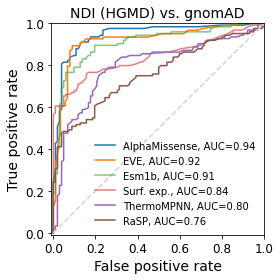

In [44]:
plt.figure(figsize=(4, 4))
plt.plot(AM_FPRs, AM_TPRs, label= 'AlphaMissense, AUC=0.94')
plt.plot(eve_FPRs, eve_TPRs, label= 'EVE, AUC=0.92')
plt.plot(esm_FPRs, esm_TPRs, alpha=0.6, label= 'Esm1b, AUC=0.91')
plt.plot(surfexp_FPRs, surfexp_TPRs, alpha=0.6, label= 'Surf. exp., AUC=0.84')
plt.plot(thermoMPNN_FPRs, thermoMPNN_TPRs, label='ThermoMPNN, AUC=0.80')
plt.plot(rasp_FPRs, rasp_TPRs, label='RaSP, AUC=0.76')


plt.ylim(-0.01, 1)
plt.xlim(-0.01, 1)
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)
plt.title('NDI (HGMD) vs. gnomAD', fontsize=14)
#plt.xlim(0.5, 1)
#plt.ylim(0.5, 1)
plt.legend(loc='lower right', frameon=False, facecolor='white', framealpha=0)
plt.tight_layout()

In [45]:
corr = abs(v2R_df_over50[['ctrls_comb', 'alpha_missense', 'EVE', 'ESM1b', 'ThermoMPNN','RaSP'  ]].corr(method='spearman'))
corr.columns = ['Surf. exp.', 'AlphaMiss.', 'EVE', 'ESM1b', 'ThermoMPNN','RaSP']
corr.index = ['Surf. exp.', 'AlphaMiss.', 'EVE', 'ESM1b', 'ThermoMPNN','RaSP']

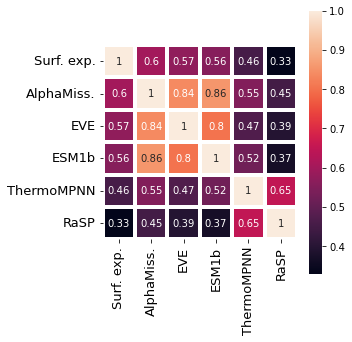

In [46]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, linewidths=4,square=True, linecolor='white')#, cbar=None)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()

In [47]:
v2R_df_missense = v2R_df.loc[(v2R_df['syn_WT'] == False) & (v2R_df['stop'] == False)]
v2R_df_over50_missense = v2R_df_missense.loc[v2R_df_missense['min_cells'] >= 50]

SpearmanrResult(correlation=-0.5997791236617815, pvalue=0.0)


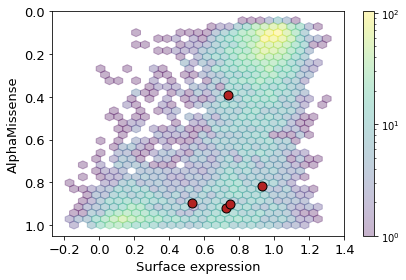

In [48]:
NSIAD_vars = v2R_df_over50_missense.loc[v2R_df_over50_missense['HGMD'] == 'NSIAD']

plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['alpha_missense'], bins='log',gridsize=30, alpha=0.3)

plt.xlabel('Surface expression', fontsize=13)
plt.ylabel('AlphaMissense', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(NSIAD_vars['ctrls_comb'], NSIAD_vars['alpha_missense'], linestyle='None',marker='o',markersize=9, markerfacecolor='firebrick', markeredgecolor='k')


print (scipy.stats.spearmanr(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['alpha_missense']))
plt.ylim(1.05, 0)
plt.colorbar()
plt.tight_layout()

SpearmanrResult(correlation=0.5427678223656529, pvalue=0.0)


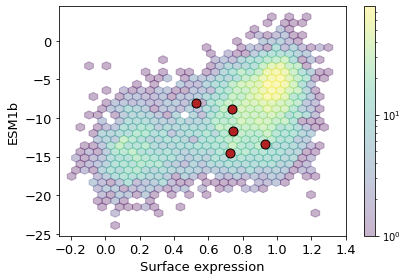

In [49]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['ESM1b'], bins='log',gridsize=30, alpha=0.3)

plt.xlabel('Surface expression', fontsize=13)
plt.ylabel('ESM1b', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(NSIAD_vars['ctrls_comb'], NSIAD_vars['ESM1b'], linestyle='None',marker='o',markersize=9, markerfacecolor='firebrick', markeredgecolor='k')

print (scipy.stats.spearmanr(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['ESM1b']))
#plt.ylim(1.1, 0)
plt.colorbar()
plt.tight_layout()

SpearmanrResult(correlation=-0.5716797573948028, pvalue=0.0)


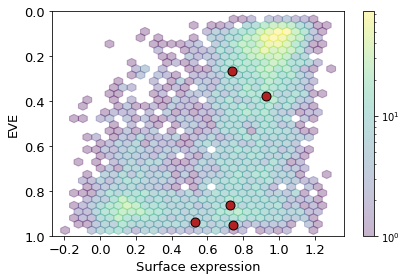

In [50]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['EVE'], bins='log',gridsize=30, alpha=0.3)

plt.xlabel('Surface expression', fontsize=13)
plt.ylabel('EVE', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print (scipy.stats.spearmanr(v2R_df_over50_missense[['ctrls_comb', 'EVE']].dropna()['ctrls_comb'], \
                             v2R_df_over50_missense[['ctrls_comb', 'EVE']].dropna()['EVE']))
plt.plot(NSIAD_vars['ctrls_comb'], NSIAD_vars['EVE'], linestyle='None',marker='o',markersize=9, markerfacecolor='firebrick', markeredgecolor='k')

plt.ylim(1.0, 0)
plt.colorbar()
plt.tight_layout()

SpearmanrResult(correlation=-0.446086346599149, pvalue=1.4007982676537812e-301)


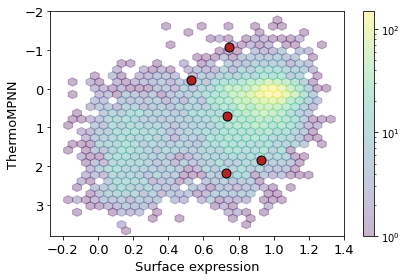

In [51]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['ThermoMPNN'], bins='log',gridsize=30, alpha=0.3)

plt.xlabel('Surface expression', fontsize=13)
plt.ylabel('ThermoMPNN', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print (scipy.stats.spearmanr(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['ThermoMPNN']))
plt.plot(NSIAD_vars['ctrls_comb'], NSIAD_vars['ThermoMPNN'], linestyle='None',marker='o',markersize=9, markerfacecolor='firebrick', markeredgecolor='k')

plt.ylim(3.8, -2)
plt.colorbar()
plt.tight_layout()

SpearmanrResult(correlation=-0.3303470643072916, pvalue=4.577015766019254e-158)


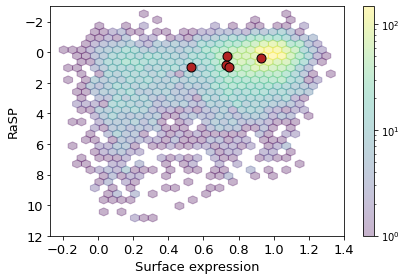

In [52]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['RaSP'], bins='log',gridsize=30, alpha=0.3)

plt.xlabel('Surface expression', fontsize=13)
plt.ylabel('RaSP', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print (scipy.stats.spearmanr(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['RaSP']))
plt.plot(NSIAD_vars['ctrls_comb'], NSIAD_vars['EVE'], linestyle='None',marker='o',markersize=9, markerfacecolor='firebrick', markeredgecolor='k')

plt.ylim(12, -3)
plt.colorbar()
plt.tight_layout()

In [53]:
NDI_poor_exp_vals = v2R_df_over50.loc[(v2R_df_over50['HGMD'] == 'NDI') & (v2R_df_over50['ctrls_comb'] < 0.35)]['dist_to_AVP_7KH0']
NDI_mod_exp_vals = v2R_df_over50.loc[(v2R_df_over50['HGMD'] == 'NDI') & (v2R_df_over50['ctrls_comb'] >= 0.35)& (v2R_df_over50['ctrls_comb'] < 0.8)]['dist_to_AVP_7KH0']
NDI_well_exp_vals = v2R_df_over50.loc[(v2R_df_over50['HGMD'] == 'NDI') & (v2R_df_over50['ctrls_comb'] > 0.8)]['dist_to_AVP_7KH0']



all_dists = []

for pos in set(list(v2R_df['pos'])):
    all_dists.append(v2R_df.loc[v2R_df['pos'] == pos].iloc[0]['dist_to_AVP_7KH0'] )

In [54]:
well_exp_poss =  (set(v2R_df_over50.loc[(v2R_df_over50['HGMD'] == 'NDI') & (v2R_df_over50['ctrls_comb'] > 0.8)].pos))
mod_destab_poss =  (set(v2R_df_over50.loc[(v2R_df_over50['HGMD'] == 'NDI') & (v2R_df_over50['ctrls_comb'] >= 0.35)& (v2R_df_over50['ctrls_comb'] < 0.8)].pos))
strong_destab_poss = (set(v2R_df_over50.loc[(v2R_df_over50['HGMD'] == 'NDI') & (v2R_df_over50['ctrls_comb'] < 0.35)].pos))


In [55]:
#these are the ones that go in the structure figure.
print ([i for i in well_exp_poss if i not in mod_destab_poss and i not in strong_destab_poss])

print ([i for i in mod_destab_poss if i not in well_exp_poss and i not in strong_destab_poss])

print ([i for i in strong_destab_poss if i not in mod_destab_poss and i not in well_exp_poss])

[140, 142, 277, 287, 162, 290, 181, 309, 311, 185, 187, 61, 317, 191, 201, 202, 209, 352, 106, 116]
[137, 273, 37, 165, 315, 192, 203, 204, 206, 88, 92, 99, 105, 119, 123]
[128, 131, 135, 272, 274, 282, 283, 285, 286, 289, 163, 164, 292, 293, 294, 169, 170, 43, 173, 46, 53, 54, 55, 57, 59, 316, 62, 319, 322, 323, 324, 207, 80, 81, 83, 214, 217, 90, 219, 95, 225, 122, 126, 127]


In [56]:
NDI_df = pd.DataFrame({'Stable': pd.Series(NDI_well_exp_vals), \
            'Moderately\n destabilized': pd.Series(NDI_mod_exp_vals), \
            'Strongly\n destabilized': pd.Series(NDI_poor_exp_vals), \
            'All\n residues': pd.Series(all_dists)})

In [57]:
print (scipy.stats.mannwhitneyu(NDI_well_exp_vals.dropna(), NDI_mod_exp_vals.dropna()))
print (scipy.stats.mannwhitneyu(NDI_poor_exp_vals.dropna(), NDI_mod_exp_vals.dropna()))
print (scipy.stats.mannwhitneyu(NDI_poor_exp_vals.dropna(), NDI_well_exp_vals.dropna()))
print (scipy.stats.mannwhitneyu(NDI_poor_exp_vals.dropna(), list(NDI_well_exp_vals.dropna()) + list(NDI_mod_exp_vals.dropna())))

MannwhitneyuResult(statistic=393.0, pvalue=0.31844952546926386)
MannwhitneyuResult(statistic=1277.5, pvalue=0.0015121260316756674)
MannwhitneyuResult(statistic=1159.0, pvalue=0.029032529295015097)
MannwhitneyuResult(statistic=2436.5, pvalue=0.000774700062232194)


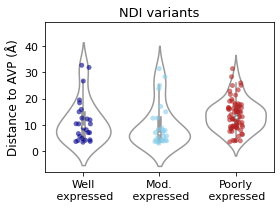

In [58]:
plt.figure(figsize=(4, 3))
NDI_df = pd.DataFrame({'Well\n expressed': pd.Series(NDI_well_exp_vals), \
            'Mod.\n expressed': pd.Series(NDI_mod_exp_vals), \
            'Poorly\n expressed': pd.Series(NDI_poor_exp_vals)})

#plt.figure(figsize=(6, 4))
my_pal = {'Well\n expressed': 'darkblue', \
          'Mod.\n expressed': 'skyblue', \
          'Poorly\n expressed': 'firebrick'}

sns.stripplot(data = NDI_df, alpha=0.6, palette = my_pal)

sns.violinplot(data = NDI_df, color='white')
plt.ylabel('Distance to AVP (Å)', fontsize=12)
plt.title('NDI variants', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.ylim(-8, 49)

plt.tight_layout()

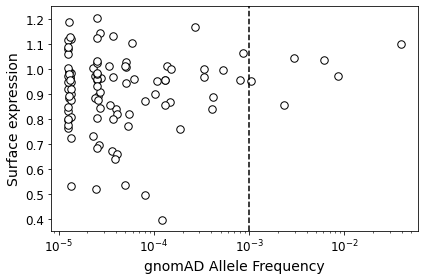

In [60]:
AFs = v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True]['gnomAD_AF']
scores = v2R_df_over50.loc[v2R_df_over50['gnomAD'] == True]['ctrls_comb']

#plt.plot(AFs, scores, 'ko', markersize=8, linewidth=2,  alpha=0.5)
plt.scatter(AFs, scores, color='white', edgecolor='k', s=56)#, alpha=0.4)


plt.xscale('log')
plt.ylim(0.35, 1.25)
plt.axvline(x=0.001, color='k', linestyle='dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('gnomAD Allele Frequency', fontsize=14)
plt.ylabel('Surface expression', fontsize=14)
plt.tight_layout()